In [3]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar

data_17_08 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('../data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('../data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('../data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('../data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('../data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('../data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('../data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('../data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [4]:
data1_frames = [data_17_08, data_17_02, data_16_08, data_16_02]
data1 = pd.concat(data1_frames)

In [5]:
# sacamos la columna id
data1 = data1.drop(['id'], axis=1)

In [6]:
data2_frames = [data_15_08, data_15_02, data_14_08, data_14_02, data_13_08]
data2 = pd.concat(data2_frames)

In [7]:
data_frames = [data1, data2]
data = pd.concat(data_frames)

# Estructura de los datos

In [7]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,NaN,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,NaN,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,-38.019951,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [10]:
data.dtypes

country_name                   object
created_on                     object
currency                       object
description                    object
expenses                       object
extra                          object
floor                         float64
geonames_id                   float64
image_thumbnail                object
lat                           float64
lat-lon                        object
lon                           float64
operation                      object
place_name                     object
place_with_parent_names        object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
properati_url                  object
property_type                  object
rooms                         float64
state_name                     object
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_tota

In [10]:
# formato de fechas
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])

In [12]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [13]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [14]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       26919
description                       16
expenses                      197677
extra                         223844
floor                         200618
geonames_id                    47886
image_thumbnail                 4523
lat                            71651
lat-lon                        71651
lon                            71651
operation                          0
place_name                        54
place_with_parent_names            0
price                          23435
price_aprox_local_currency     23435
price_aprox_usd                23435
price_per_m2                   49583
price_usd_per_m2               85765
properati_url                      0
property_type                      0
rooms                         115319
state_name                         0
surface_covered_in_m2          29197
surface_in_m2                 223844
surface_total_in_m2            62816
t

In [15]:
data.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,year
count,23226.000000,1.759580e+05,152193.000000,152193.000000,2.004090e+05,2.004090e+05,2.004090e+05,1.742610e+05,1.380790e+05,108525.000000,194647.000000,0.0,161028.000000,223844.00000
mean,17.799836,3.488861e+06,-34.587684,-58.513448,3.382800e+05,4.345470e+06,2.567219e+05,4.453948e+03,2.026821e+03,2.988030,150.070451,NaN,265.065603,2016.30515
std,126.350565,4.032057e+05,0.849350,0.704857,7.763883e+05,6.636703e+06,3.928122e+05,1.973984e+04,5.306152e+03,1.490981,3272.695499,NaN,1674.710127,0.75282
min,1.000000,3.427208e+06,-41.167596,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,6.275958e-02,0.000000e+00,1.000000,0.000000,NaN,0.000000,2012.00000
25%,2.000000,3.429617e+06,-34.639315,-58.587002,1.000000e+05,1.593656e+06,9.500000e+04,1.521739e+03,1.085714e+03,2.000000,47.000000,NaN,52.000000,2016.00000
50%,3.000000,3.430787e+06,-34.600007,-58.480858,1.700000e+05,2.646675e+06,1.580000e+05,2.096154e+03,1.760000e+03,3.000000,80.000000,NaN,99.000000,2016.00000
75%,6.000000,3.435506e+06,-34.547926,-58.412990,3.300000e+05,4.940460e+06,2.900000e+05,2.933333e+03,2.450000e+03,4.000000,167.000000,NaN,248.000000,2017.00000
max,7071.000000,6.693230e+06,52.619706,5.011710,1.234568e+08,8.212711e+08,5.000000e+07,4.000000e+06,1.271027e+06,32.000000,987897.000000,NaN,200000.000000,2017.00000


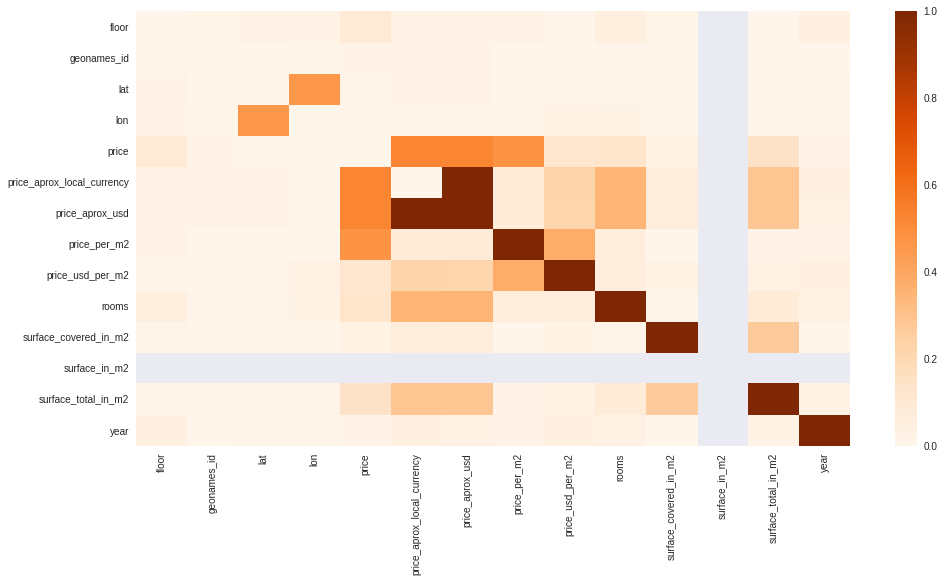

In [13]:
# este podríamos sacarlo 
fig, ax = plt.subplots(figsize=(16,8))
cor = data.corr().abs()
cor.values[[np.arange(6)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

# Qué cantidad de avisos se registraron por año?

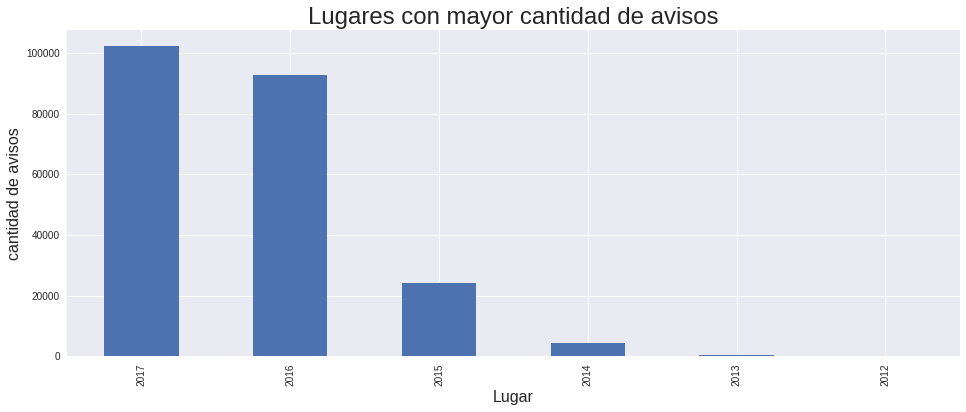

In [132]:
fig = plt.figure()

ax = data['year'].value_counts()[0:6].plot(kind='bar',figsize=(16,6));

plt.title('Lugares con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Lugar', fontsize= 16)
ax.set_ylabel('cantidad de avisos', fontsize= 16)

fig.savefig('top20CantidadDeAvisos.jpg');

In [ ]:
# puede obsevase que la mayor cantidad de avisos se publicaron en el año 2017, si bien es poca la diferencia
# con respecto al año 2016 esta diferencia podría ser aún mayor al terminar el año 2017 ya los datos registrados para este
# año son hasta agosto

# cuáles son los principales lugares donde se registró la mayor cantidad de avisos?

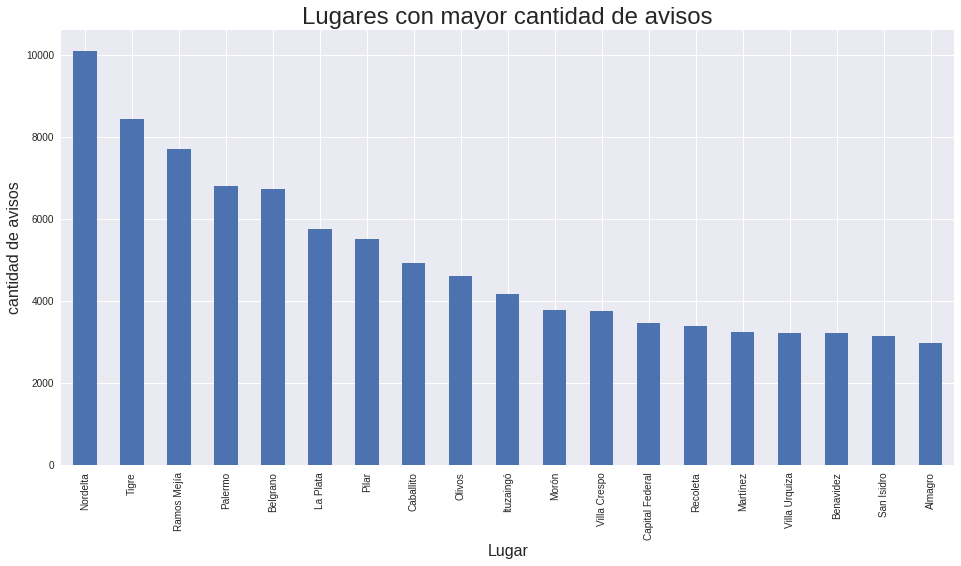

In [130]:
# top 20 lugares con mas ventas
fig = plt.figure()

plt.title('Lugares con mayor cantidad de avisos', fontsize=24)

ax = data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,8));

ax.set_xlabel('Lugar', fontsize= 16)
ax.set_ylabel('cantidad de avisos', fontsize= 16)

fig.savefig('top20CantidadDeAvisos.jpg');

# ¿Qué tipo de propiedad son las que más se publicaron?

In [154]:
apartment_year = data.loc[data.property_type == 'apartment',['year']]
house_year = data.loc[data.property_type == 'house',['year']]
ph_year = data.loc[data.property_type == 'PH',['year']]
store_year = data.loc[data.property_type == 'store',['year']]

In [155]:
data_apartment = apartment_year['year'].value_counts().sort_index()
data_house = house_year['year'].value_counts().sort_index()
data_ph = ph_year['year'].value_counts().sort_index()
data_store = store_year['year'].value_counts().sort_index()

data_apartment.rename('Apartment', inplace=True)
data_house.rename('House', inplace=True)
data_ph.rename('PH', inplace=True)
data_store.rename('Store', inplace=True)

data_by_year = pd.concat([data_apartment,data_house, data_ph, data_store], axis=1)
print('datos por año\n',data_by_year)

datos por año
       Apartment  House      PH   Store
2012        NaN      3     NaN     NaN
2013      193.0    181    34.0     9.0
2014     1768.0   2011   351.0   218.0
2015    12654.0   8938  1739.0   792.0
2016    49581.0  34067  5617.0  3300.0
2017    58816.0  34570  5551.0  3451.0


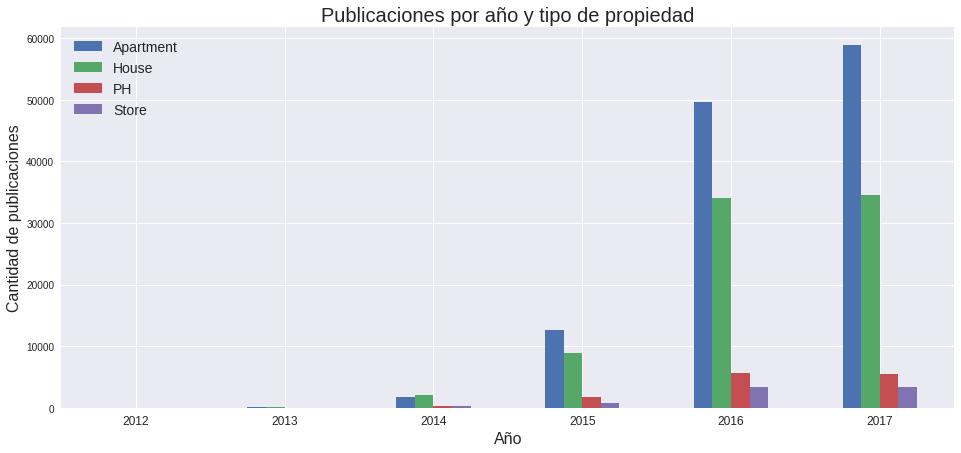

In [166]:
fig = plt.figure()

### no guarda el gráfico

year = ['2012','2013','2014','2015','2016','2017']

ax2 = data_by_year.plot(kind='bar', figsize=(16,7))

ax2.set_title('Publicaciones por año y tipo de propiedad', fontsize=20)
ax2.set_xlabel('Año', fontsize=16)
ax2.set_ylabel('Cantidad de publicaciones', fontsize=16)
ax2.set_xticklabels(year,rotation='horizontal', fontsize=12)
ax2.legend(prop={'size':14});

fig.savefig('publicacionesPorAnioYPropiedad.jpg');

# porcentaje de los tipos de propiedades durante los años

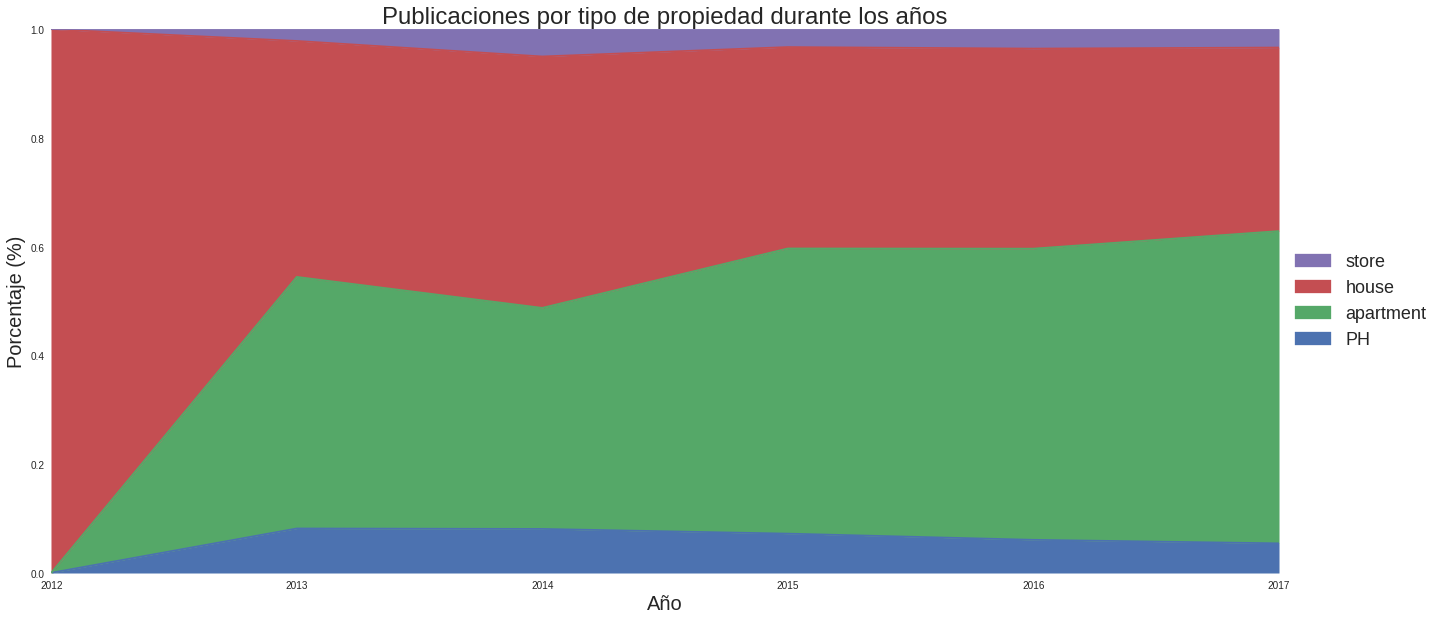

In [104]:
property_type_by_year = pd.DataFrame(data.groupby(['property_type','year']).size())
property_type_by_year.columns = ['num']

property_type_by_year.reset_index(inplace=True)

pivoted = pd.pivot_table(property_type_by_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

fig = plt.figure()

plt.title('Publicaciones por tipo de propiedad durante los años', fontsize=24)
ax = pivoted.plot(kind='area', stacked=True,figsize=(22,10),ax=fig.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize= 18)
ax.set_ylabel('Porcentaje (%)', fontsize=20);
ax.set_xlabel('Año', fontsize=20);
ax.set_ylim(0,1)
plt.show()

fig.savefig('publicacionesPorTipoPropiedad.jpg');

# Superficie total promedio a través del tiempo

In [66]:
grouped = data[['property_type','surface_total_in_m2','created_on']].dropna()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#En algunos casos la superficie total era demasiada
#decidí tomar el promedio dentro de un rango de valores más o menos "usual"
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]

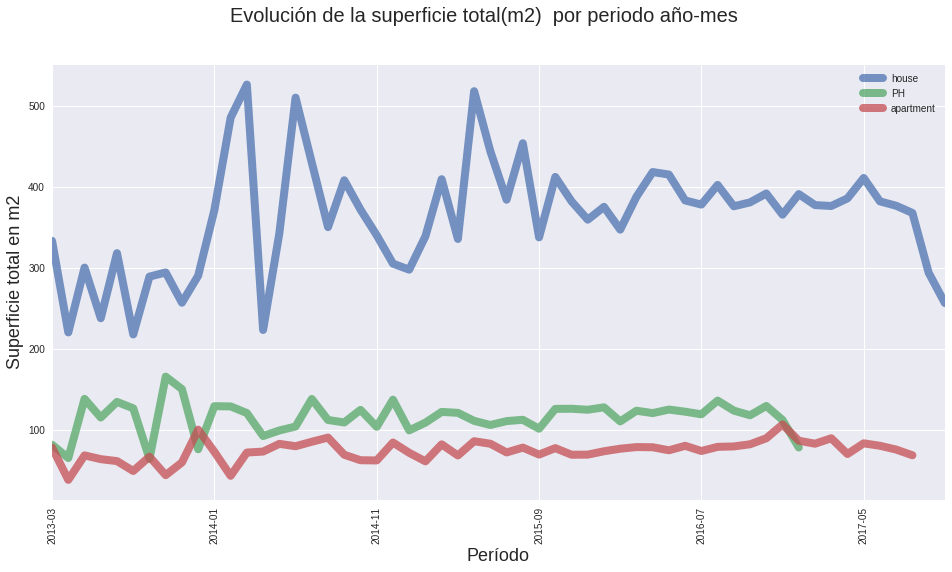

In [87]:
fig = plt.figure()

fig.suptitle('Evolución de la superficie total(m2)  por periodo año-mes', fontsize=20)

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH')

ax = Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment')

ax.set_xlabel('Período', fontsize= 18)
ax.set_ylabel('Superficie total en m2', fontsize= 18)
    
plt.legend();

#fig.savefig('supTotalPorPeriodo.jpg');

# Número total de ambientes de los departamentos en venta

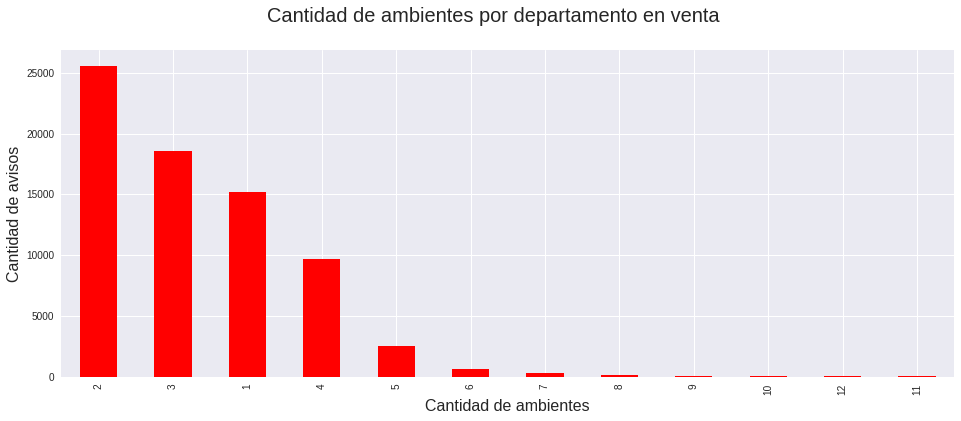

In [121]:
fig = plt.figure()

fig.suptitle('Cantidad de ambientes por departamento en venta', fontsize=20)

rooms_per_apartment = data.loc[(data.property_type=='apartment') & (data.rooms<13) ,['property_type','rooms']].dropna()
ax = rooms_per_apartment['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,6), color='red');

ax.set_xlabel('Cantidad de ambientes', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

fig.savefig('ambientesPorDepto.jpg');

# ¿Cuáles son los meses en los cuales se da la mayor cantidad de avisos?

In [33]:
data.month.value_counts()

July         55556
February     23091
June         17420
August       16919
January      16417
November     15493
May          14670
December     14127
April        14114
October      13316
March        13312
September     9409
Name: month, dtype: int64

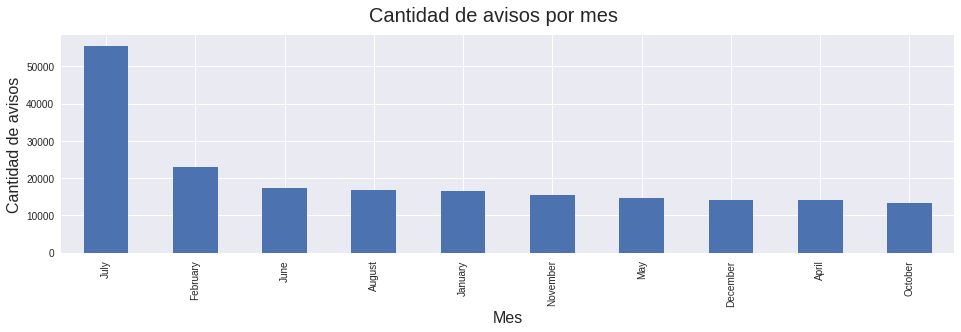

In [124]:
fig = plt.figure()

# para guardar el grafico figsize=(16,8)
ax = data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4));

fig.suptitle('Cantidad de avisos por mes', fontsize=20)
ax.set_xlabel('Mes', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

fig.savefig('avisosPorMes.jpg');

In [ ]:
# se puede pensar que el mes de julio donde mayor cantidad de avisos publicitarios coincide con el medio aguinaldo

In [108]:
# Heatmap - top 20 lugares con mas ventas por mes
import seaborn as sns

grouped = data[['place_name', 'month']].groupby(['place_name','month'])['place_name'].agg(['count'])
grouped_by_month = grouped.loc[grouped['count'] > 0,:].sort_values('count', ascending=False).head(20)
grouped_by_month = grouped_by_month.reset_index()

grouped_by_month

,place_name,month,count
0,Tigre,July,2233
1,Belgrano,July,2169
2,Palermo,July,2159
3,Nordelta,July,2152
4,Nordelta,February,1980
5,La Plata,July,1907
6,Ramos Mejía,July,1552
7,Caballito,July,1541
8,Pilar,July,1481
9,Lomas de Zamora,July,1445


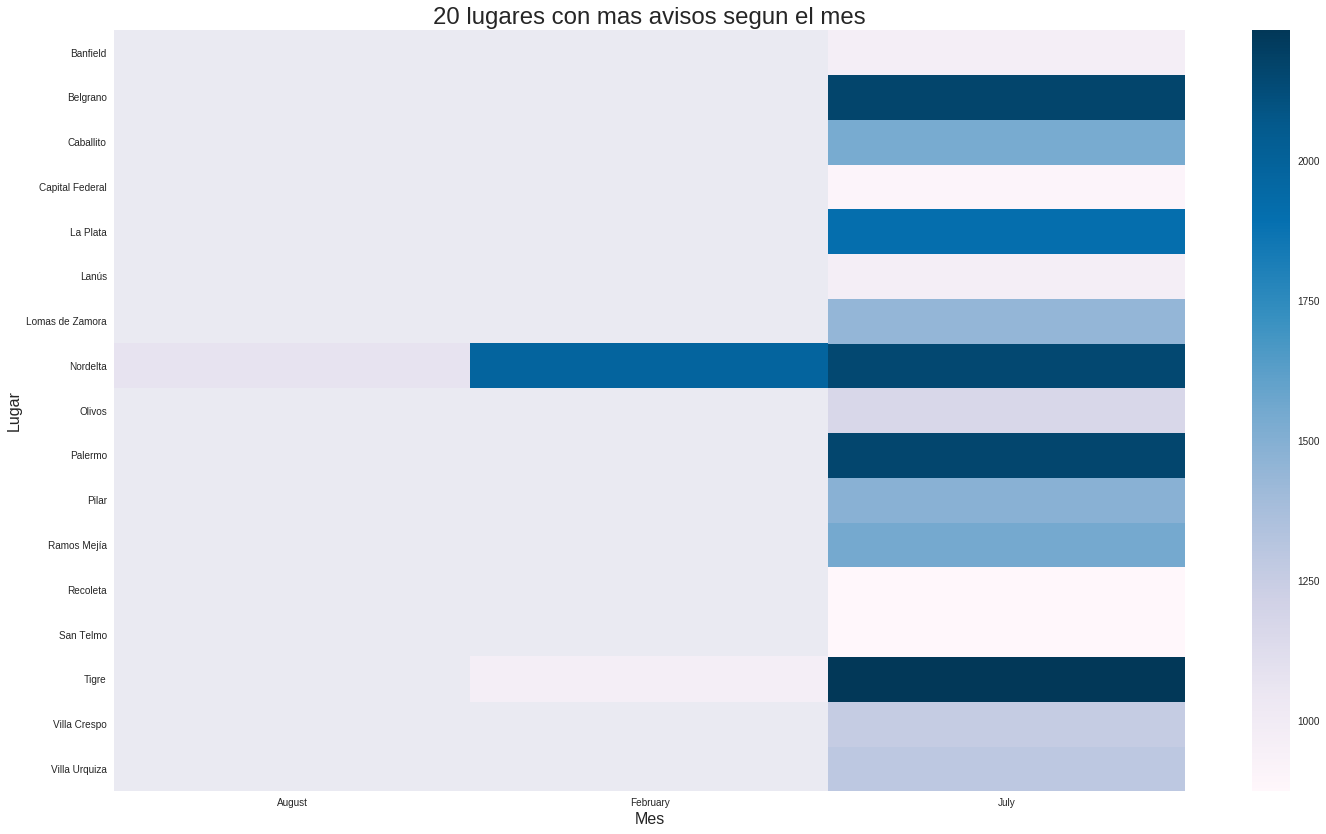

In [109]:
fig = plt.figure()

grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='month', index='place_name')
fig, ax = plt.subplots(figsize=(24,14))

ax.set_title('20 lugares con mas avisos segun el mes', fontsize= 26)
sns.heatmap(grouped_by_month,cmap='PuBu', linecolor='red')
ax.set_xlabel('Mes', fontsize= 16)
ax.set_ylabel('Lugar', fontsize= 16)

fig.savefig('top20SegunMes.jpg');

# ¿En qué año y qué tipo de propiedad se registró la mayor cantidad de avisos?

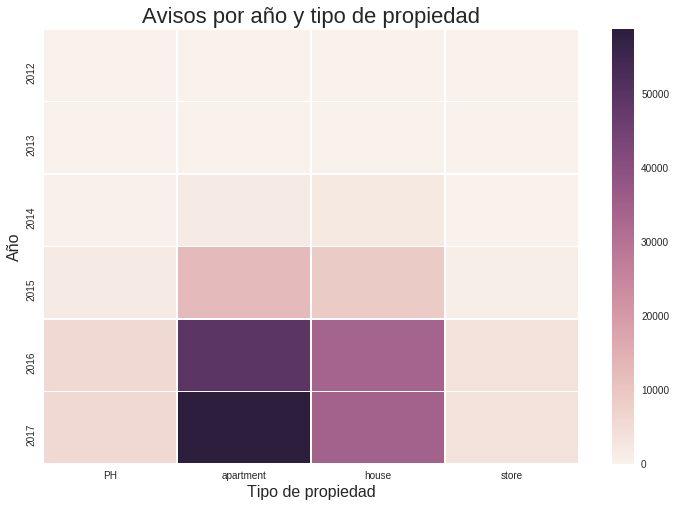

In [116]:
# cantidad de ventas año y tipo de propiedad
fig = plt.figure()

data_grouped = data.groupby(['year','property_type']).size().reset_index()
data_grouped.columns=['year','property_type','size']
data_grouped = data_grouped.pivot(index='year', columns='property_type',values='size')
data_grouped.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(data_grouped, annot=False, linewidths=.5, ax=ax)

ax.set_title('Avisos por año y tipo de propiedad', fontsize= 22)
ax.set_xlabel('Tipo de propiedad', fontsize= 16)
ax.set_ylabel('Año', fontsize= 16)

fig.savefig('ventasPorAnioYTipoPropiedad.jpg');

# ¿ Cantidad de publicaciones en  Capital Federal y G.B.A. ?

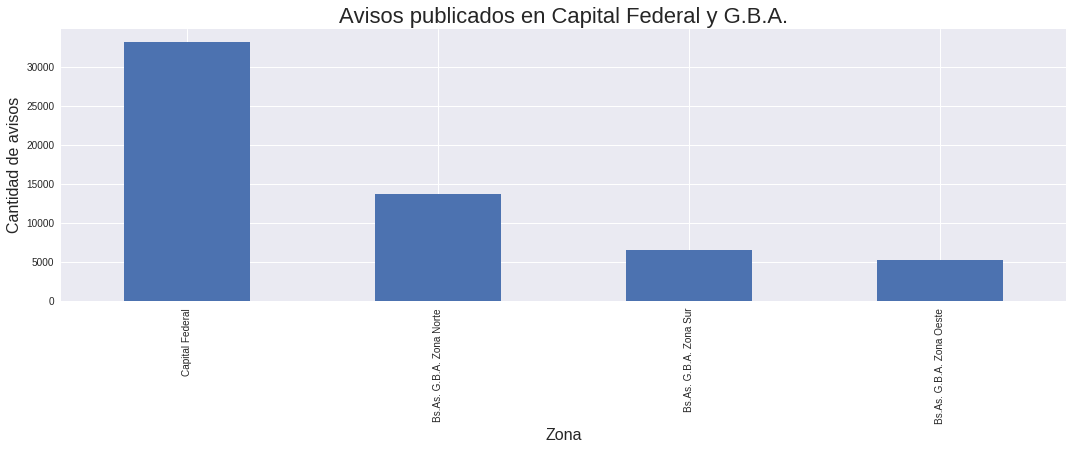

In [180]:
fig = plt.figure()

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]

grouped = filtered[['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size, np.mean])
# por lo menos 50 ventas
ax = grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,5));

ax.set_title('Avisos publicados en Capital Federal y G.B.A.', fontsize= 22)
ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16)

fig.savefig('avisos_cab_gba.jpg');

In [173]:
#De cuántos ambientes son las casas ofrecidas en Gran Buenos Aires
gba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('G.B.A')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
gba.created_on = pd.to_datetime(gba.created_on, format='%Y/%m/%d')
gba.rooms.value_counts()

4.0     8428
3.0     6883
5.0     5131
6.0     1868
2.0     1405
7.0      811
1.0      275
8.0      274
9.0       95
10.0      91
11.0      18
12.0      12
Name: rooms, dtype: int64

In [174]:
gba = gba.loc[gba.rooms==4,:] #me quedo con la cantidad mas significativa
gba.place_name.value_counts()
gba = gba.loc[:,['price_usd_per_m2','created_on','place_name']].dropna()
gba.place_name.value_counts()

Ramos Mejía                            556
Haedo                                  321
Ituzaingó                              243
Tigre                                  192
Villa Luzuriaga                        115
Caseros                                110
Olivos                                 106
San Justo                              101
Escobar                                101
Villa Ballester                         86
Pilar                                   83
Nordelta                                81
Villa Sarmiento                         74
General San Martín                      72
El Palomar                              68
Castelar                                65
Benavidez                               64
La Plata                                60
Morón                                   57
Maschwitz                               53
Presidente Perón                        50
Lomas del Mirador                       48
San Miguel                              43
Canning    

In [175]:
selected_places_gba = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_gba.head()

price_usd_per_m2                                             \
place_name          Escobar Haedo   Ituzaingó        Pilar Ramos Mejía   
created_on                                                               
2013-05-24              NaN   NaN         NaN  1063.842871         NaN   
2013-07-22              NaN   NaN         NaN          NaN  1867.46988   
2014-01-13              NaN   NaN         NaN          NaN         NaN   
2014-03-29              NaN   NaN  340.909091          NaN         NaN   
2014-04-29              NaN   NaN  309.090909          NaN         NaN   

                         
place_name        Tigre  
created_on               
2013-05-24  1205.357143  
2013-07-22          NaN  
2014-01-13   440.285235  
2014-03-29          NaN  
2014-04-29          NaN

In [176]:
selected_places_gba.columns = selected_places_gba.columns.droplevel()
meds = selected_places_gba.median()
selected_places_gba = selected_places_gba[meds.index]

In [177]:
meds.sort_values(ascending=False)

place_name
Ramos Mejía    1293.309438
Haedo          1043.460925
Pilar          1029.411765
Escobar         900.000000
Tigre           861.320133
Ituzaingó       673.538961
dtype: float64

In [178]:
Media_price = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1162.025162
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en G.B.A ?

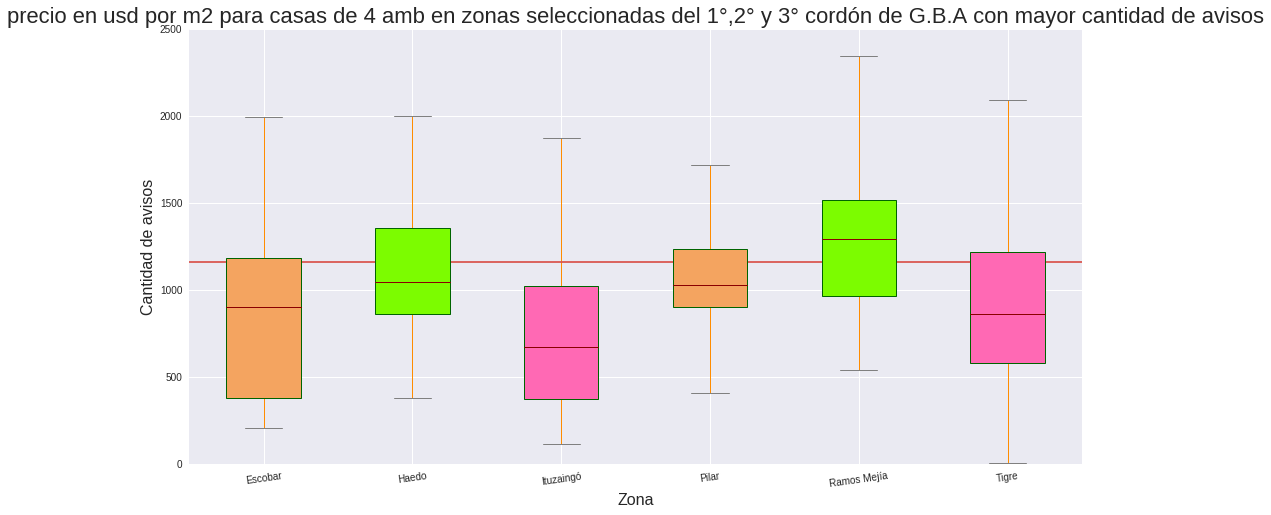

In [186]:
fig = plt.figure()

# no guarda el gráfico

props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")

boxplot=selected_places_gba.plot.box(return_type='dict', figsize=(16,8),rot=8, color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,2500])

ax.set_title('precio en usd por m2 para casas de 4 amb en zonas seleccionadas del 1°,2° y 3° cordón de G.B.A con mayor cantidad de avisos', fontsize= 22)
ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16)

plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'sandybrown' )
boxplot['boxes'][3].set( facecolor = 'sandybrown' )
boxplot['boxes'][1].set( facecolor = 'lawngreen' )
boxplot['boxes'][4].set( facecolor = 'lawngreen' )
boxplot['boxes'][2].set( facecolor = 'hotpink' )
boxplot['boxes'][5].set( facecolor = 'hotpink' )

fig.savefig('zona123GBA.jpg');

In [39]:
#De cuántos ambientes son las casas ofrecidas en Capital Federal
caba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('Capital')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
caba.created_on = pd.to_datetime(caba.created_on, format='%Y/%m/%d')
caba.rooms.value_counts()

5.0     661
4.0     569
6.0     319
3.0     213
7.0     156
1.0      65
2.0      51
8.0      38
9.0      18
10.0     18
11.0     15
12.0      7
Name: rooms, dtype: int64

In [40]:
caba = caba.loc[caba.rooms==4,['created_on','place_name','price_usd_per_m2']].dropna()
caba.place_name.value_counts()

Mataderos              27
Villa Devoto           21
Barracas               17
Liniers                15
Caballito              14
Saavedra               14
Floresta               11
Belgrano               11
Colegiales             10
Villa Lugano           10
Villa Urquiza          10
Villa del Parque        9
Palermo                 9
Flores                  8
Nuñez                   8
Villa Pueyrredón        7
Almagro                 6
Boedo                   5
Capital Federal         5
Versalles               5
Chacarita               5
Parque Chacabuco        4
Villa Luro              3
Pompeya                 3
Parque Patricios        3
Villa Ortuzar           3
San Nicolás             3
Paternal                3
Monte Castro            2
Boca                    2
Villa Crespo            2
Coghlan                 2
Velez Sarsfield         1
Villa Real              1
Barrio Norte            1
Palermo Hollywood       1
Abasto                  1
Villa General Mitre     1
Recoleta    

In [41]:
selected_places_caba = caba.loc[(caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name == 'Mataderos') | \
                                        (caba.place_name== 'Barracas') | \
                                        (caba.place_name== 'Liniers') | \
                                        (caba.place_name== 'Caballito'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_caba.head()

price_usd_per_m2                                                 
place_name         Barracas Caballito      Liniers    Mataderos Villa Devoto
created_on                                                                  
2013-05-05       921.052632       NaN          NaN          NaN          NaN
2013-07-19              NaN       NaN          NaN  1327.160494          NaN
2015-09-22              NaN       NaN          NaN   932.642487          NaN
2015-09-24              NaN       NaN  1084.033613          NaN          NaN
2015-11-07              NaN       NaN          NaN          NaN  1543.478261

In [42]:
selected_places_caba.columns = selected_places_caba.columns.droplevel()
meds = selected_places_caba.median()
selected_places_caba = selected_places_caba[meds.index]

In [43]:
meds.sort_values(ascending=False)

place_name
Villa Devoto    1800.000000
Caballito       1750.760269
Liniers         1104.516807
Mataderos       1036.842702
Barracas         976.021548
dtype: float64

In [44]:
Media_price = caba.loc[(caba.place_name == 'Barracas') | \
                                        (caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name== 'Caballito') | \
                                        (caba.place_name== 'Mataderos') | \
                                        (caba.place_name== 'Liniers'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1335.710025
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en CABA ?

[None]

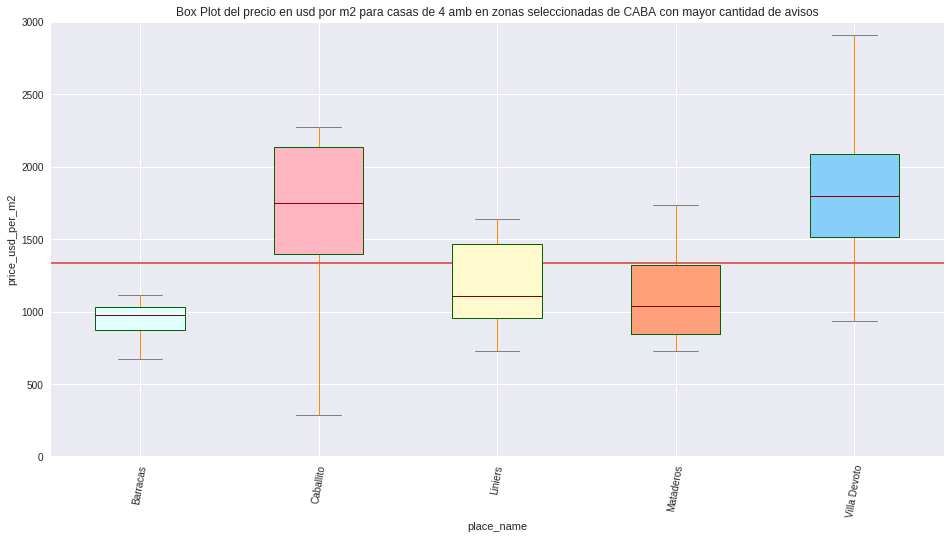

In [45]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_caba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas de CABA con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,3000]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'lightcyan' )
boxplot['boxes'][3].set( facecolor = 'lightsalmon' )
boxplot['boxes'][1].set( facecolor = 'lightpink' )
boxplot['boxes'][4].set( facecolor = 'lightskyblue' )
boxplot['boxes'][2].set( facecolor = 'lemonchiffon' )

# Dónde hubo más venta de propiedades nuevas

In [189]:
new_prop = data.loc[(data.description.str.contains('nuevo') |data.description.str.contains('estrenar'))\
         , ['state_name','created_on','currency','rooms','property_type','surface_total_in_m2']]

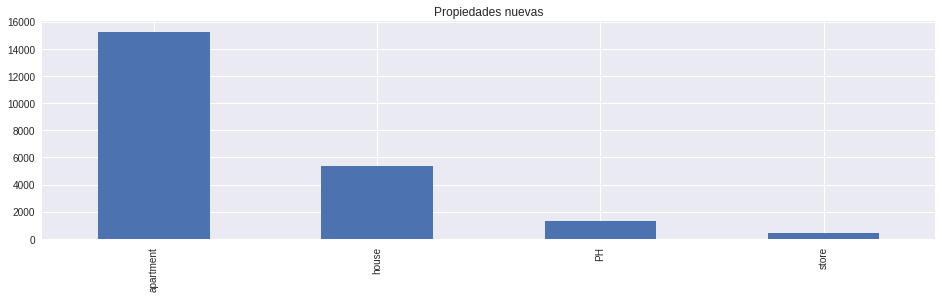

In [190]:
new_prop['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

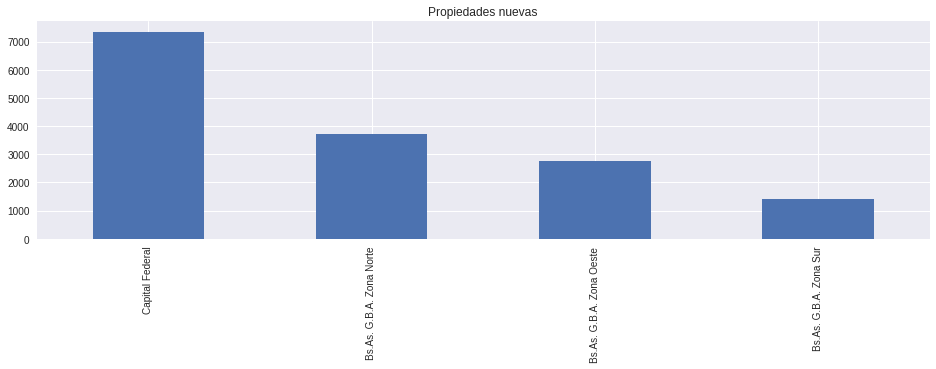

In [191]:
new_prop_state = new_prop.loc[new_prop.property_type == 'apartment']
new_prop_state['state_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

In [192]:
#Qué cantidad de estas propiedades nuevas tiene precio fijado en USD
new_prop.currency.value_counts()

USD    19600
ARS      680
Name: currency, dtype: int64

# Cuál fue la cantidad de ambientes de los departamentos nuevos en CABA

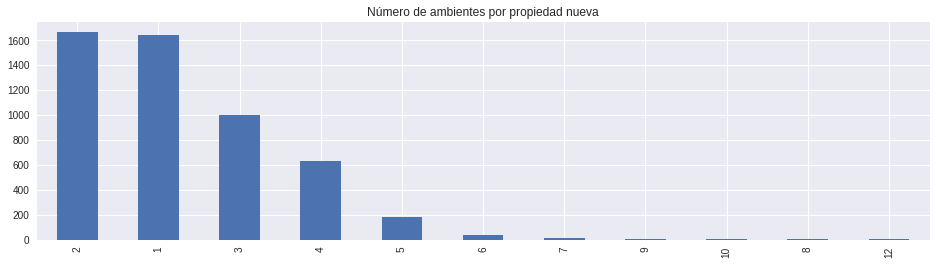

In [193]:
new_prop_CABA_rooms = new_prop.loc[(new_prop.state_name == 'Capital Federal') & \
                                   (new_prop.property_type == 'apartment'),['rooms','property_type']].dropna()
new_prop_CABA_rooms['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Número de ambientes por propiedad nueva");

# Cuál fue el tamaño en m2 de los departamentos nuevos de 1 ambiente en CABA

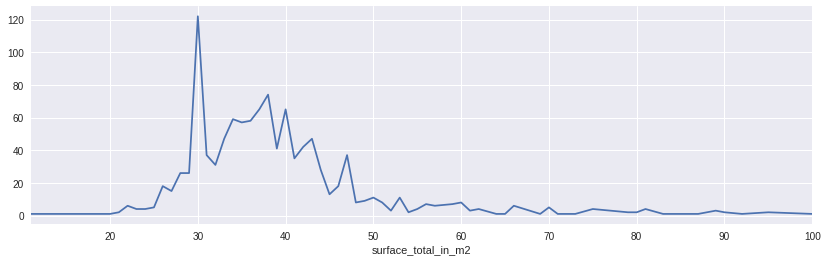

In [194]:
new_prop.created_on = pd.to_datetime(new_prop.created_on, format='%Y/%m/%d')
new_prop['Periodo'] = new_prop['created_on'].map(lambda x: x.strftime('%Y-%m'))

new_1caba =new_prop.loc[(new_prop.rooms==1) & (new_prop.surface_total_in_m2<101) &\
             (new_prop.state_name=='Capital Federal') &\
            (new_prop.surface_total_in_m2>10)]
new_1caba.groupby('surface_total_in_m2').count()['property_type'].plot(figsize=(14,4))

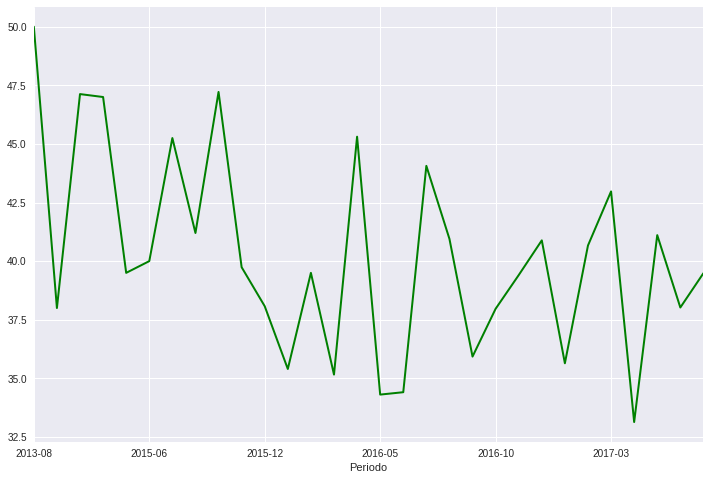

In [195]:
#Promedio de superficie total en m2 a través del tiempo
new_1caba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Evolución de la superficie total promedio en m2 de los departamentos nuevos de 2 ambientes en G.B.A

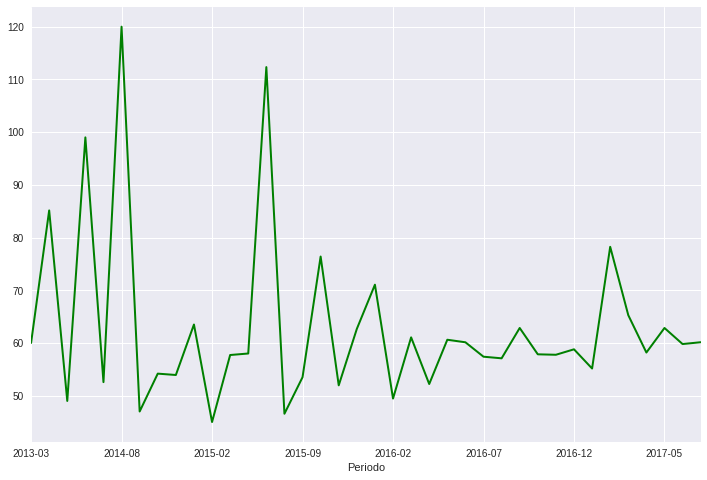

In [196]:
new_2gba =new_prop.loc[(new_prop.rooms==2) & (new_prop.surface_total_in_m2<300) &\
             (new_prop.state_name.str.contains('G.B.A')) &\
            (new_prop.surface_total_in_m2>40)]
new_2gba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Relación entre número de ambientes y valor de expensas

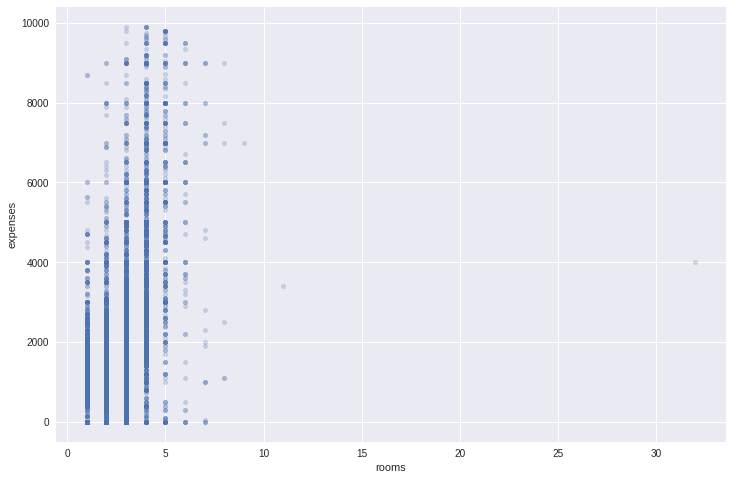

In [53]:
floor_vs_exp = data.loc[data.state_name=='Capital Federal',['expenses','rooms']].dropna()
floor_vs_exp.expenses = floor_vs_exp.expenses.astype(int)
floor_vs_exp = floor_vs_exp.loc[(floor_vs_exp.expenses<10000)]
floor_vs_exp.plot.scatter('rooms','expenses',alpha=0.25,figsize=(12,8));

In [ ]:
......................
......................
......................


# ¿ qué tipo de departamentos son los publicados ese año?

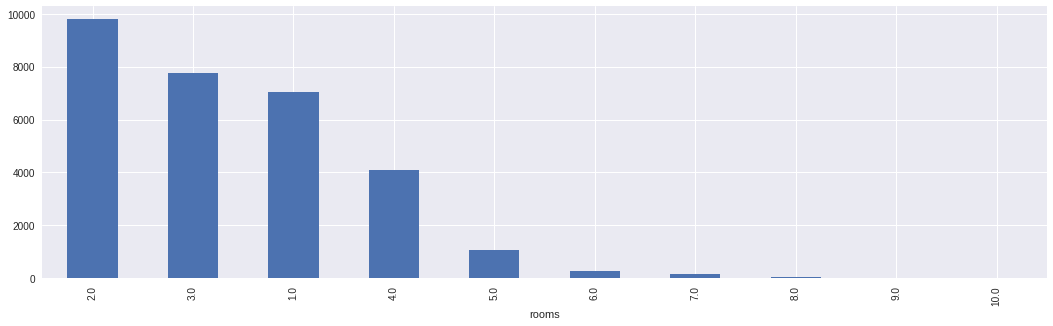

In [85]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms > 0)]
grouped = filtered[['rooms','price_usd_per_m2']].groupby('rooms').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','size')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

# para los departamentos de 1, 2 y 3 habitaciones ¿cómo influye el piso en el precio de la propiedad ?

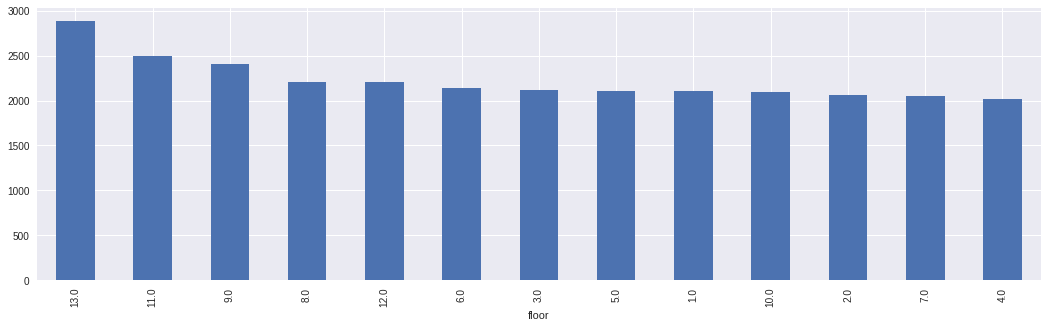

In [100]:
# rooms == 2, parece que no muestra nada interesante 

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms == 2)]

grouped = filtered[['floor','price_usd_per_m2']].groupby('floor').agg([np.size, np.mean])

grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','mean')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

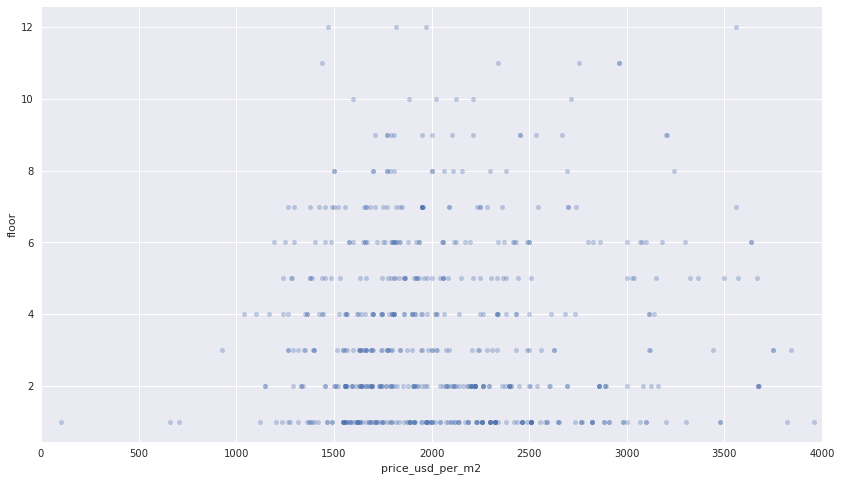

In [93]:
data_apart_floor = data[(data.year == 2017) & (data.property_type == 'apartment') & (data.floor < 13) &(data.rooms == 2)]

ax = plt.subplot(111)
data_apart_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(14,8),ax=ax);
ax.set_xlim(0,4000);

# ¿Cuáles son los principales lugares donde se registraron estas ventas?

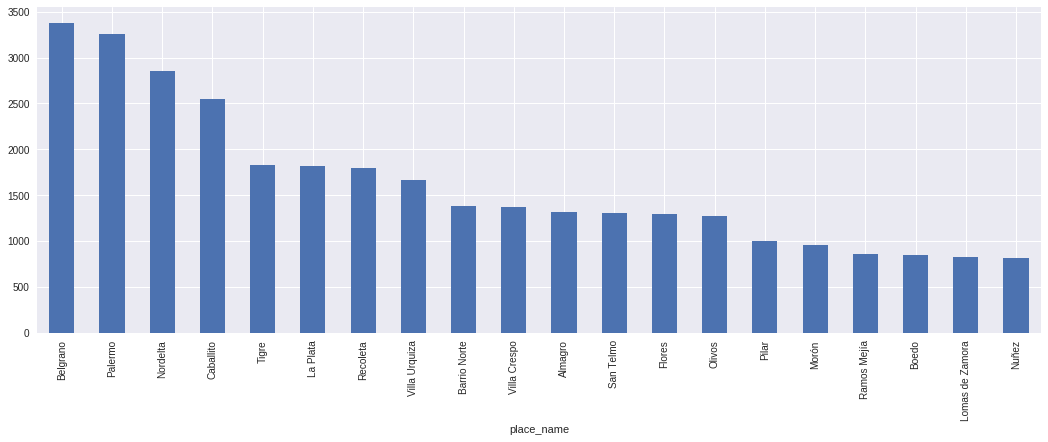

In [58]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]
grouped = filtered.groupby(['place_name']).agg(['count'])

grouped = filtered[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

# publicaciones de Capital Federal por tipo de propiedad durante los años

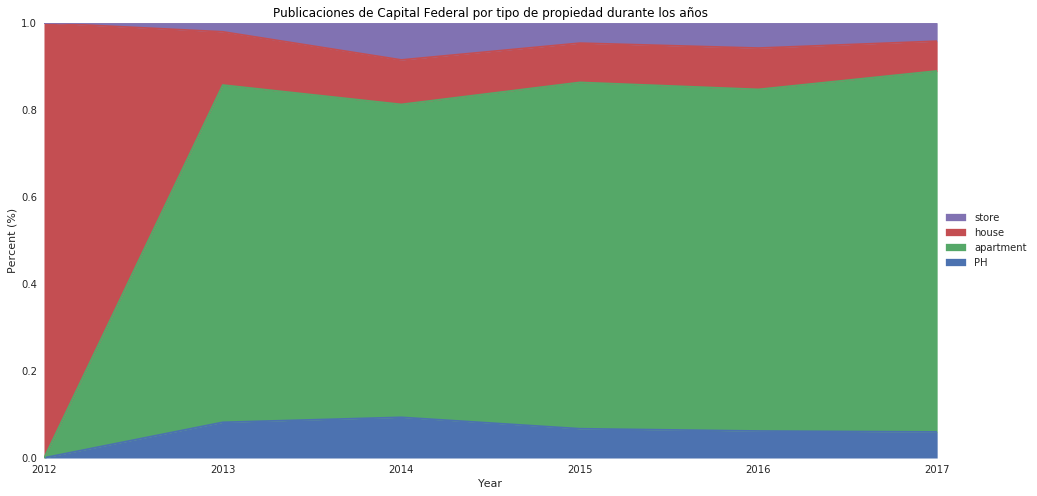

In [95]:
caba_year = pd.DataFrame(data.loc[data.state_name == 'Capital Federal'].groupby(['property_type','year']).size())
caba_year.columns = ['num']

caba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(caba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

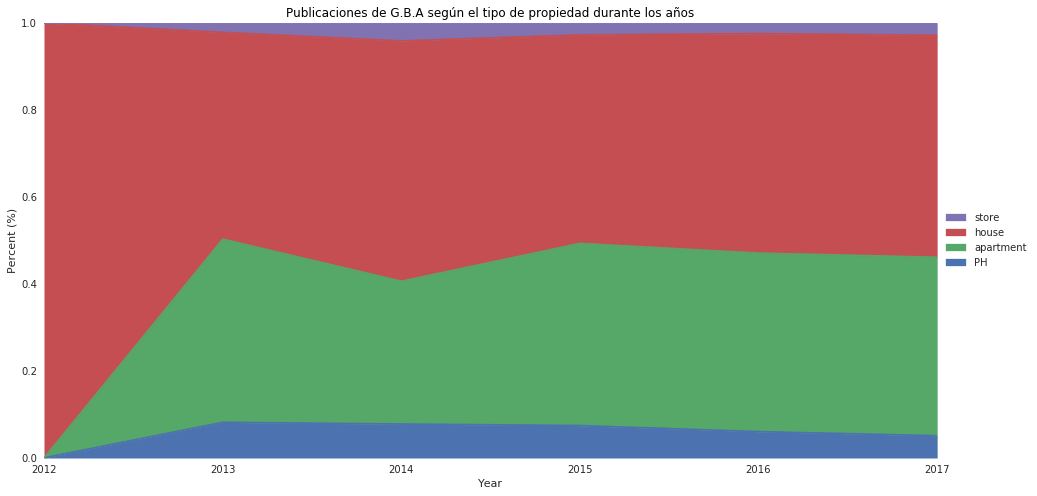

In [60]:
gba_year = pd.DataFrame(data.loc[data.state_name.str.contains('G.B.A')].groupby(['property_type','year']).size())
gba_year.columns = ['num']

gba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(gba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de G.B.A según el tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

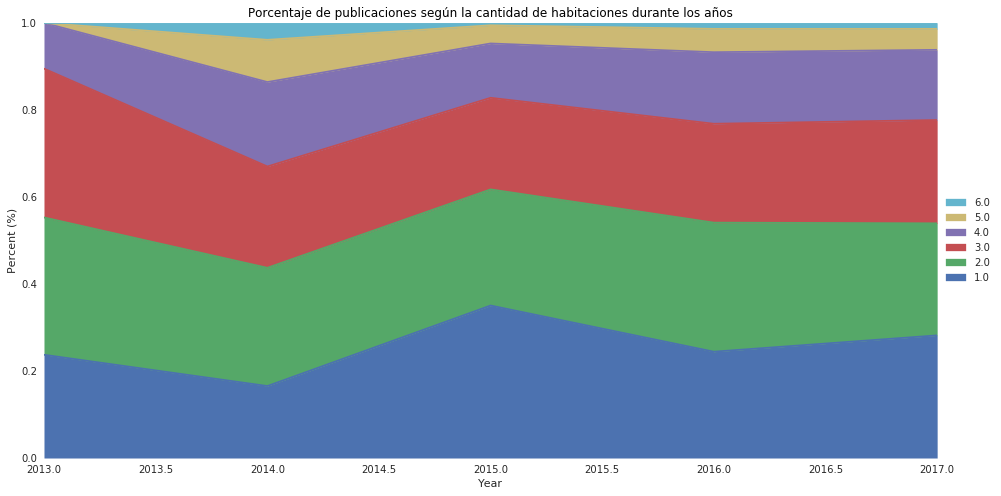

In [61]:
gy = pd.DataFrame(data.loc[(data.state_name == 'Capital Federal') & (data.property_type=='apartment')\
                          & (data.rooms < 7)].groupby(['rooms','year']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='rooms', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje de publicaciones según el número de ambientes durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

In [97]:
data_depto = data[data.property_type == 'apartment']

In [98]:
data_depto = data_depto[data_depto.rooms < 7]

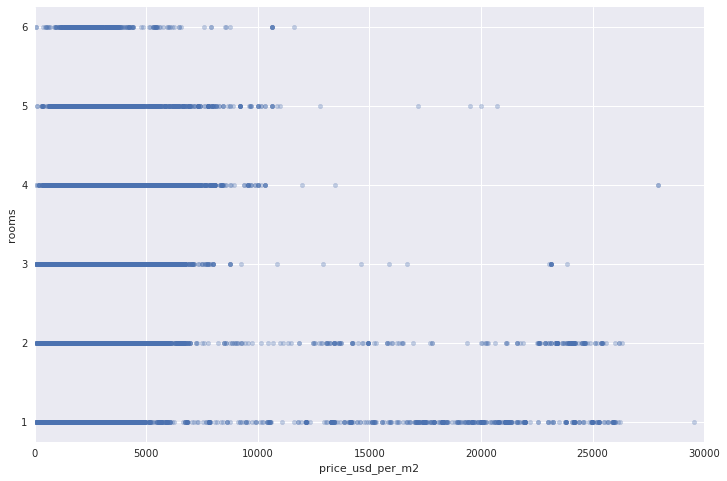

In [103]:
ax = plt.subplot(111)
data_depto.plot.scatter('price_usd_per_m2','rooms',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,30000);

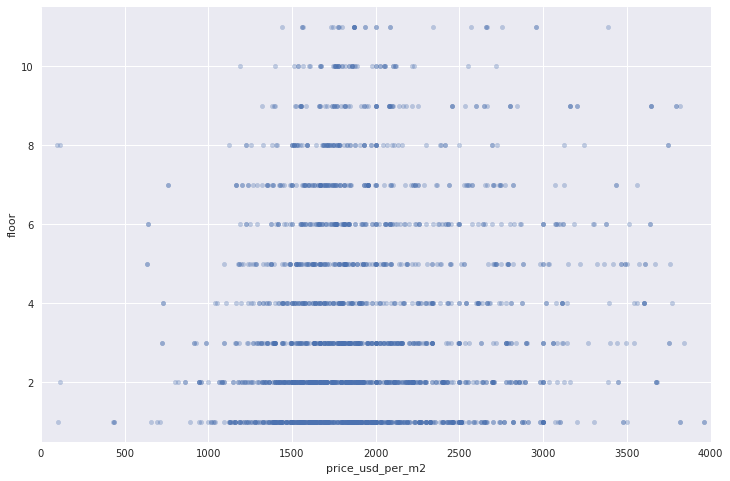

In [92]:
apartment_floor = data.loc[(data.property_type == 'apartment') & (data.rooms == 2), ['price_usd_per_m2','floor']]

ax = plt.subplot(111)
apartment_floor = apartment_floor.loc[(apartment_floor.floor < 12)]
apartment_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,4000);